In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PhysActivity import create_df
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import warnings

In [75]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Adjust settings to display all rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
survey_df = pd.read_csv('pat_w1w2.csv')
weekly_df = pd.read_csv('accl_public.csv')

df = create_df(survey_df,weekly_df)

In [59]:
df.head()

,Age,Gender,bmicat4,Health,Hypertension,cholesterol,Diabetes,Asthma,Arthritis,Depression,...,Diet,stairs9,MVPA,Valid_Days,MVPA_bout,counts_avg,Sed_avg,Light_avg,moderate_avg,vigorous_avg
1200003,3.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,4.0,2.0,450.0,7.0,20.000000,168996.857143,491.428571,243.285714,15.285714,0.000000
1200005,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,4.0,735.0,6.0,11.666667,212667.166667,439.833333,226.333333,16.166667,0.000000
1200010,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,5280.0,7.0,0.000000,213606.000000,427.285714,302.285714,11.000000,0.000000
1200012,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,4.0,600.0,7.0,74.000000,316133.285714,485.142857,279.000000,37.714286,2.142857
1200015,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,1.0,2040.0,6.0,152.833333,420184.500000,429.500000,348.166667,59.833333,0.000000


 <font size="4"> Columns to consider for cluster analysis:</font> 
 
These are the features that stand out the most to me as indicators of physical activity and health based on intuition as well as the correlation analysis. They also seem to be the most easily generalized for an average person outside of the study. 


- Health (reported health status)
- Age
- MVPA (All minutes per week of all physical activity)
- Diet (diet)
- Exer_routine (Regular exercise routine)
- gym_member (had gym membership in the last year)
- screentime (Categories of hours per weekday of television or computer use during weekdays)
- phys7 (During the last 7 days, did you do anysports, fitness, or recreational activities?)
- tobacco1 (Tobacco use)
- bmicat4 (Body Mass Index (BMI), categorical)
- cholesterol (High cholesterol)
- Diabetes (Presense of diabetes)
- chronic1 (Hypertension)
- Sleep (Number of days in the last 30 days the participant did not have enough rest or sleep)
- Mental (Number of days in the last 30 days the participant didn't have good mental health)
- counts_avg (*"The accelerometer was set to record activity in 10 second increments – this number represents an average of all counts on all valid days"*)
- moderate_avg (Average number of Moderate minutes on all valid days, measured by accelerometer)

 <font size="3"> Feature Key: </font> 

**Age:**
     
| Label|Meaning (age in years)|
| --- | --- |
|1|18-24|
|2|25-44|
|3|45-64|
|4|65+  |

**Health:**

| Label|Meaning|
| --- | --- |
|1|Excellent|
|2|Very good|
|3|Good|
|2|Fair|
|3|Poor|

The following variables use the same labeling (Excellent-Poor): 
-  **Diet:**

**Exer_routine:**

|Label|Meaning|
| --- | --- |
|1|Yes|
|2|No|

The following variables use the same labeling (Yes/No): 
- **"gym_member**
- **cholesterol**
- **Diabetes**
- **Hypertension**

**screentime:**

| Label|Meaning|
| --- | --- |
|1|Never|
|2|½ hour or less|
|3|1-1 ½ hours|
|4|2-2 ½ hours|
|5|3-3 ½ hours|
|6|4-4 ½ hours|
|7|5-5 ½ hours|
|8|6-6 ½ hours|
|9|7-7 ½ hours|
|10|8-9 ½ hours|
|11|10-12 hours|

**tobacco1**

| Label|Meaning|
| --- | --- |
|1|Most days (or all days)|
|2|Some days|
|3|Never|

**bmicat4**

| Label|Meaning|
| --- | --- |
|1|Underweight|
|2|Normal weight|
|3|Overweight|
|4|Obese|

In [54]:
# Create dataframe for cluster analysis
df_cluster = df.loc[:,['Health','Age','MVPA','Diet','Exer_routine','gym_member','screentime','phys7',\
                   'tobacco1','bmicat4','cholesterol','Diabetes','Hypertension','Sleep','Mental','counts_avg','moderate_avg']]

# Replace NaNs with 0 values, and convert all numerical values to integer types
df_cluster.fillna(0,inplace = True)
df_cluster = df_cluster.astype('int')

In [55]:
df_cluster.shape

(516, 17)

In [56]:
df_cluster.head()

,Health,Age,MVPA,Diet,Exer_routine,gym_member,screentime,phys7,tobacco1,bmicat4,cholesterol,Diabetes,Hypertension,Sleep,Mental,counts_avg,moderate_avg
1200003,1,3,450,4,2,1,5,2,3,4,2,2,2,4,0,168996,15
1200005,3,2,735,4,2,2,4,2,3,2,2,2,2,5,0,212667,16
1200010,2,2,5280,2,2,2,4,2,3,2,2,2,2,0,2,213606,11
1200012,3,2,600,2,1,1,6,2,3,2,2,2,2,10,0,316133,37
1200015,2,2,2040,4,1,2,4,2,3,2,2,2,2,7,1,420184,59


## K Means 

In [13]:
# View dataframe stats
round(df_cluster.describe(),1)

,Health,Age,MVPA,Diet,Exer_routine,gym_member,screentime,phys7,tobacco1,bmicat4,cholesterol,Diabetes,Hypertension,Sleep,Mental,counts_avg,moderate_avg
count,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0
mean,2.4,2.8,698.0,2.7,1.5,1.6,4.8,1.5,2.8,2.8,1.8,1.9,1.7,8.3,3.4,284645.2,32.5
std,1.0,0.8,884.9,1.0,0.5,0.5,2.1,0.5,0.6,0.9,0.4,0.3,0.5,9.5,7.2,138253.2,25.8
min,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36479.0,0.0
25%,2.0,2.0,170.0,2.0,1.0,1.0,3.0,1.0,3.0,2.0,2.0,2.0,1.0,0.0,0.0,187652.8,13.0
50%,2.0,3.0,420.0,3.0,2.0,2.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,5.0,0.0,257931.5,27.0
75%,3.0,3.0,840.0,3.0,2.0,2.0,6.0,2.0,3.0,4.0,2.0,2.0,2.0,15.0,3.0,354922.8,46.0
max,5.0,4.0,5460.0,5.0,2.0,2.0,11.0,2.0,3.0,4.0,3.0,2.0,2.0,30.0,30.0,1109214.0,194.0


In [50]:
# Transform the data (so that features have similar ranges)

df_cluster_trans = StandardScaler().fit_transform(df_cluster)

# Create new dataframe
df_cluster_trans = pd.DataFrame(df_cluster_trans, columns = df_cluster.columns.tolist())

In [38]:
round(df_cluster_trans.describe(),1)

,Health,Age,MVPA,Diet,Exer_routine,gym_member,screentime,phys7,tobacco1,bmicat4,cholesterol,Diabetes,Hypertension,Sleep,Mental,counts_avg,moderate_avg
count,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0,516.0
mean,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.4,-3.4,-0.8,-2.6,-1.0,-1.4,-2.3,-1.1,-4.7,-3.3,-4.0,-6.1,-3.8,-0.9,-0.5,-1.8,-1.3
25%,-0.4,-1.0,-0.6,-0.6,-1.0,-1.4,-0.8,-1.1,0.4,-1.0,0.5,0.3,-1.6,-0.9,-0.5,-0.7,-0.8
50%,-0.4,0.3,-0.3,0.3,1.0,0.7,-0.4,0.9,0.4,0.2,0.5,0.3,0.6,-0.3,-0.5,-0.2,-0.2
75%,0.6,0.3,0.2,0.3,1.0,0.7,0.6,0.9,0.4,1.4,0.5,0.3,0.6,0.7,-0.1,0.5,0.5
max,2.5,1.5,5.4,2.2,1.0,0.7,2.9,0.9,0.4,1.4,2.8,0.3,0.6,2.3,3.7,6.0,6.3


We can see that after transformation, the mean of all the features is zero, and the standard deviation is 1.

### Elbow Method

Not let us plot the Sum of Squares Errors (SSE) of the K means model vs. the number of clusters to get an idea for the number of clusters we should use:

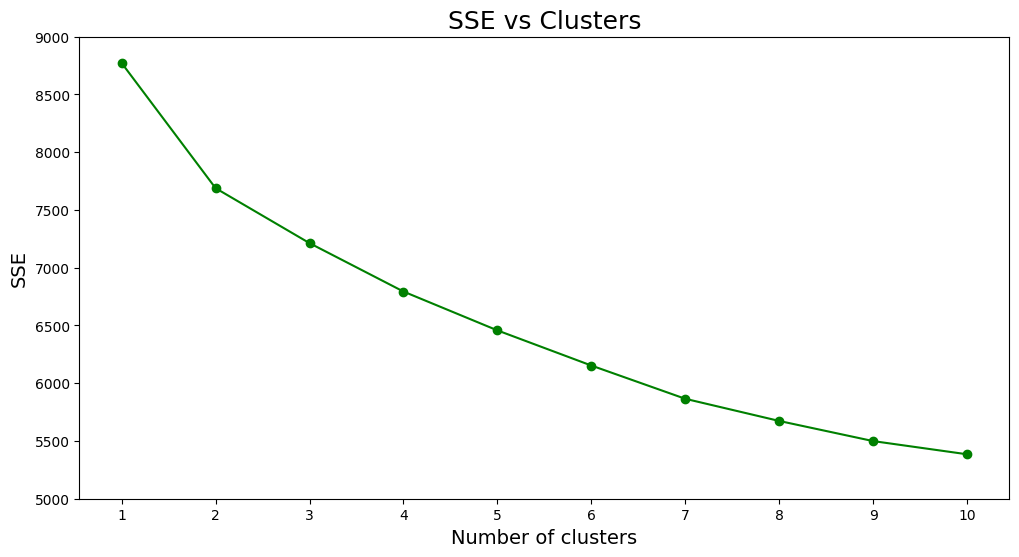

In [176]:
SSE = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++',random_state = 0, n_init = 30)
    kmeans.fit(df_cluster_trans)
    SSE.append(kmeans.inertia_)
    
#frame = pd.DataFrame({'Number of clusters':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(range(1,11), SSE, marker='o', color = 'g')
plt.title("SSE vs Clusters", fontsize = 18)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('SSE', fontsize = 14)
plt.xticks(range(1,11));
plt.yticks(np.arange(5000,9001,500));

We can see that the error drops off sharply between 1 and 2 clusters. So, according to this chart, using 2 clusters would be optimal. Let us run the K means algorithms with 3 clusters and see the result.

### Cluster analysis with 2 clusters:

In [115]:
n_clusters = 2

k_means = KMeans(init = "k-means++", n_clusters = n_clusters, n_init = 30 ,random_state = 0)
k_means.fit(df_cluster_trans)
df_cluster['Cluster'] = k_means.labels_

for i in range(n_clusters):
    print("Cluster",i+1," (random sample of 8):")
    display(df_cluster[df_cluster['Cluster'] == i].sample(8))
    for j in df_cluster.columns:
        print("Average ", j, ":", round(np.mean(df_cluster[df_cluster['Cluster'] == i][j]),1))
   

Cluster 1  (random sample of 8):


,Health,Age,MVPA,Diet,Exer_routine,gym_member,screentime,phys7,tobacco1,bmicat4,cholesterol,Diabetes,Hypertension,Sleep,Mental,counts_avg,moderate_avg,Cluster
1201985,3,2,870,5,1,1,4,1,3,4,1,2,2,15,20,222156,33,0
1200751,2,3,280,3,2,2,4,2,3,3,2,2,1,20,0,118301,5,0
1200241,4,4,315,1,1,2,7,2,3,2,2,1,1,3,0,84790,2,0
1201112,2,3,10,1,2,2,4,2,1,3,2,2,2,4,0,211625,13,0
1200372,1,3,780,2,2,2,5,2,3,3,2,2,2,3,0,219433,8,0
1200479,4,3,0,3,2,2,4,2,3,2,1,1,1,30,10,181034,9,0
1202030,3,3,0,4,2,2,6,2,3,4,2,2,2,4,0,158627,5,0
1201190,3,3,0,3,2,2,4,2,3,3,1,1,2,2,0,183890,13,0


Average  Health : 2.9
Average  Age : 3.1
Average  MVPA : 531.8
Average  Diet : 3.0
Average  Exer_routine : 1.8
Average  gym_member : 1.8
Average  screentime : 5.5
Average  phys7 : 1.8
Average  tobacco1 : 2.6
Average  bmicat4 : 3.1
Average  cholesterol : 1.7
Average  Diabetes : 1.8
Average  Hypertension : 1.6
Average  Sleep : 9.7
Average  Mental : 4.6
Average  counts_avg : 214115.2
Average  moderate_avg : 20.2
Average  Cluster : 0.0
Cluster 2  (random sample of 8):


,Health,Age,MVPA,Diet,Exer_routine,gym_member,screentime,phys7,tobacco1,bmicat4,cholesterol,Diabetes,Hypertension,Sleep,Mental,counts_avg,moderate_avg,Cluster
1200069,2,1,480,3,2,2,9,1,3,2,2,2,2,0,0,277429,44,1
1200068,2,2,2600,2,1,2,4,1,2,2,2,2,2,15,3,439934,69,1
1200727,2,2,135,3,2,2,6,1,3,1,2,2,2,15,4,174733,30,1
1201811,2,4,315,1,1,1,4,1,3,2,2,2,2,3,0,230422,25,1
1200088,3,3,700,2,1,1,3,1,3,4,2,2,1,0,0,161885,7,1
1202194,3,1,1005,4,2,2,6,1,2,0,2,2,2,8,30,459035,68,1
1201251,2,2,835,3,2,2,2,1,3,4,2,2,2,6,0,332323,46,1
1200976,1,2,1200,3,1,1,3,1,3,4,2,2,2,30,0,680068,61,1


Average  Health : 1.9
Average  Age : 2.5
Average  MVPA : 854.3
Average  Diet : 2.3
Average  Exer_routine : 1.3
Average  gym_member : 1.5
Average  screentime : 4.1
Average  phys7 : 1.3
Average  tobacco1 : 2.9
Average  bmicat4 : 2.6
Average  cholesterol : 1.9
Average  Diabetes : 2.0
Average  Hypertension : 1.9
Average  Sleep : 6.9
Average  Mental : 2.3
Average  counts_avg : 350932.8
Average  moderate_avg : 44.1
Average  Cluster : 1.0


In [ ]:
9.7

In [166]:
for i in range(0,2):
    print("Number of participants with an exercise routine in cluster ", i+1, ":",\
    df_cluster[(df_cluster['Cluster'] == i)]['Exer_routine'][df_cluster['Exer_routine'] == 1].sum())

Number of participants with an exercise routine in cluster  1 : 62
Number of participants with an exercise routine in cluster  2 : 185


In [162]:
df_cluster[(df_cluster['Cluster'] == 0)]['Diabetes'][df_cluster['Exer_routine'] == 2].sum()

345

In [170]:
for i in range(0,2):
    for j in ['Diabetes','Hypertension','cholesterol']:
        print("Number of participants with", j, " in cluster ", i+1, ":",\
        df_cluster[df_cluster['Cluster'] == i][j][df_cluster[j] == 1].sum())

Number of participants with Diabetes  in cluster  1 : 43
Number of participants with Hypertension  in cluster  1 : 112
Number of participants with cholesterol  in cluster  1 : 77
Number of participants with Diabetes  in cluster  2 : 9
Number of participants with Hypertension  in cluster  2 : 30
Number of participants with cholesterol  in cluster  2 : 32


Note: "with cholesterol" means "with high cholesterol"

In [ ]:
for i in range(2):
    print("Number of participants with Hypertension in cluster ", i+1, ":",\
    df_cluster[(df_cluster['Cluster'] == 0)]['Diabetes'][df_cluster['Hypertension'] == i].sum())

We took a random sample of 8 participants for each cluster and printed the average value of each variable. 

Based on this, it seems like the algorithm divided people into those that are "Healthy" (cluster 2) and "Unhealthy" (cluster 1).

We could see that cluster 1 contains individuals with an average "Health" variable of 1.9, which is equivalent to "very good", while cluster 2 is at 2.9, which is just "good". Surprisingly, the average ages are very similar, with cluster 1 being a little older (as to be expected). 

Notable characteristics of Cluster 2 (Healthy):
- Better Sleep (2.8 days less bad sleep days during the last 30 days)
- Better Diet (roughly, a difference of "very good" and "good")
- Much less screentime (about 2.5 hours, compared to Cluster 1's 3.5 hours average)
- Slightly lower BMI
- Participants with diabetes, hypertension, and high cholesterol: (43,9), (112,30), and (77,32) for clusters 1 and 2, respectively.
- Half the days with bad mental health for cluster 2 vs cluster 1, at average amount of days of 2.3 and 4.6 respectively.
- 34% lower TV and computer usage

Now, as for physical activity, we see some very clear differences:

- 185 with an exercise routine in cluster 1, while 62 in cluster 2.
- An average of about 14,000 average accelerometer counts
- Twice (!) the average number of minutes of moderate physical activity intensity (as opposed to light and vigorous) on all valid days, measured by accelerometer

For reference, the clusters form almost an even split of the data, with Cluster 1 containing 250 samples, while sample 2 has 266.

In [157]:
df_cluster['Cluster'].value_counts().sort_values()

0    250
1    266
Name: Cluster, dtype: int64

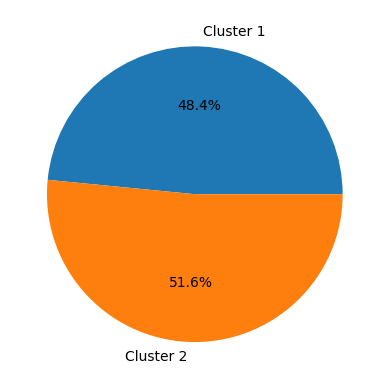

In [156]:
code_portions = df_cluster['Cluster'].value_counts().sort_values()
labels = ["Cluster 1", "Cluster 2"]
fig, ax = plt.subplots();
ax.pie(code_portions, labels=labels, autopct='%1.1f%%');

## SVM